學習資源：https://www.coursera.org/learn/deep-neural-network

## 應用
* 機器學習是一個迭代的過程，因為在最初無法賦予所有超參數最精確的數值。
  * #layers
  * #hidden units
  * learning rates
  * activation function
  * ...
* 想法→代碼→實驗→結果→改進想法→...，不斷嘗試進而迭代出更好的神經網路。

### Train/dev/test sets

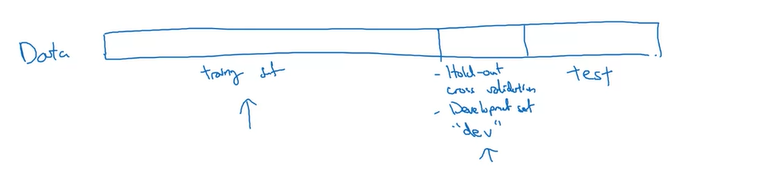
將數據分成訓練(60%)、比對(20%)、測試集(20%)。  
但在現今大數據的前提下，若總數據有100萬個，則比對集與測試集可能都只需要1萬個樣本就夠了(不一定要維持這個比例，60%,20%,20%)。


#### 訓練集與測試集的數據分配不相同
* 測試集用網路中抓的圖片，大多是像素高、高分辨率的圖片。
* 比對集與測試集是使用用戶上傳的照片，可能相對比較模糊，因為使用較不專業的器材且拍攝的較為隨意。
* 這會造成兩種不同的分布。
* 確保兩者均勻分配算法才可以進步更快。


### Bias / Variance
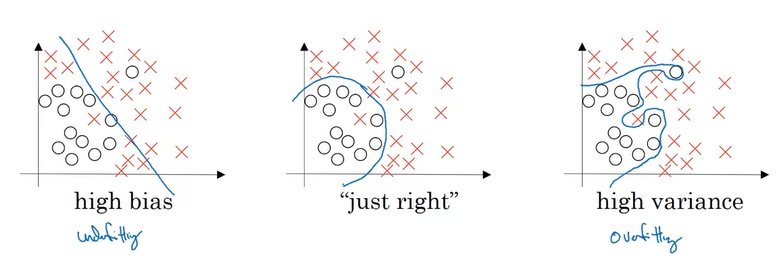  




* 高偏差：在交叉比對集上表現良好，在訓練集上表現不佳。
* 高方差：在訓練集上表現良好，在交叉比對集上表現不佳。

ex.基準誤差=0.5%  
高偏差:=訓練集誤差=15%, 交叉比對集誤差=16%  
高方差:=訓練集誤差=1%, 交叉比對集誤差=11%  
高偏差&高方差:=訓練集誤差=15%, 交叉比對集誤差=30%  

**高偏差&高方差**  
誤差高表示據高偏差，但同時只對中間的樣本過度擬和，展現出高方差的特性
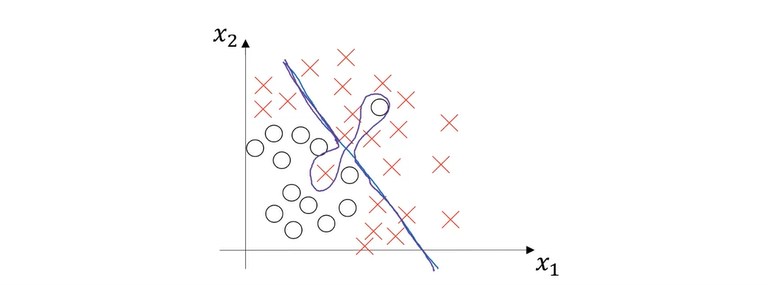


訓練好神經網路後，透過模型在訓練集上的表現，確認這個算法是否有高偏差?  
若有，可以嘗試設計新的神經網路(ex.增加隱藏層、神經元數量)、梯度下降運行更多次、更改神經網路架構。  

高方差?  
若有，獲取更多數據再次進行訓練、若無法獲得更多數據，嘗試正則化、更改神經網路架構。 

直到成功訓練出低偏差、低方差的模型。

* 想改善高方差問題，使用正則化可防止過擬和。  
### 正則化(Regularization)


**邏輯回歸**中最小化代價函數$\mathop{min}\limits_{w,b}J(w,b)$  
$J(w,b)=\frac{1}{m}\sum\limits^{m}_{i=1}L(\hat{y}^{(i)}, y^{(i)})+\frac{\lambda}{2m}||w||^2_2\textcolor{red}{(+\frac{\lambda}{2m}b^2)}$, $w\in R^{n_x}$是x維的向量參數, $b\in R$是一個實數, $\lambda$是正則化參數。  

**L2 正則化**$\rightarrow$ $||w||^2_2=\sum\limits^{n_x}_{j=1}w_j^2=w^Tw=(w的轉置)$x$(w)$ 

上方公式中的<font color="red">紅色部分</font>通常會省略掉，因為$w$通常是一個高維的參數向量(尤其在高方差發生時，因為有許多w，因此無法完美的擬和所有參數)，而b只是單個數字，幾乎所有參數都在w中，因此加上公式中紅色部分並不會有太大的幫助。  

L2 正則化是最常見的正則化方式。  

**L1 正則化**$\rightarrow$ $\frac{\lambda}{\textcolor{red}{2}m}\sum\limits^{n_x}_{i=1}|w_j|=\frac{\lambda}{\textcolor{red}{2}m}||w||_1$  
使用L1 正則化，$w$會變得稀疏($w$矢量中會有很多0，可使占用的空間變少，但對改善參數用處不大)


**神經網路**中代價函數$J(w^{[1]},b^{[1]},...,w^{[L]},b^{[L]})=\frac{1}{m}\sum\limits^{m}_{i=1}L(\hat{y}^{(i)}, y^{(i)})+\frac{\lambda}{2m}\sum\limits^{L}_{l=1}||w^{[l]}||^2$  
$||w^{[l]}||^2=\sum\limits^{n^{[l]}}_{i=1}\sum\limits^{n^{[l-1]}}_{j=1}(w^{[l]}_{i,j})^2$  
$i=1\sim n^{[l]}$  
$j=1\sim n^{[l-1]}$  

梯度下降，透過反向傳播得到$J$對於$w$的偏導數  
$dw^{[l]}=\frac{∂J}{∂w^{[l]}}$  
$\rightarrow dw^{[l]}=\frac{∂J}{∂w^{[l]}}\textcolor{red}{+\frac{\lambda}{m}w^{[l]}}$  
$\rightarrow w^{[l]}:=w^{[l]}-\alpha dw^{[l]}$  


#### 隨機失活正則化(dropout regularization)

對於 dropout，需要遍歷網路的每一層並設定消除神經網路中節點的機率。假設對於每一層的節點，有0.5的機會保留，有0.5的機會刪除，隨機選出要刪除的節點後，清除節點上所有正在進行的運算，再做反向傳播訓練→隨機編碼每個節點的去留，以獲得一個更小的神經網路，減緩過擬和的情況。  
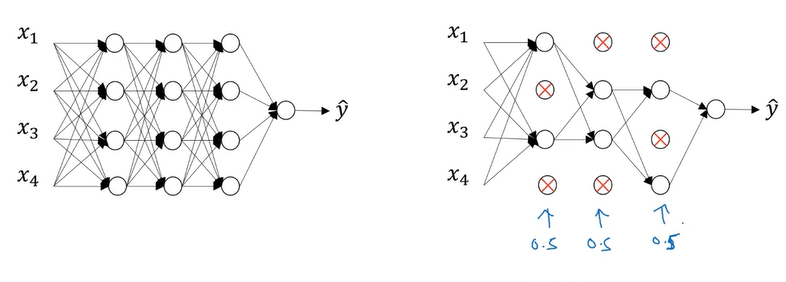  



#### Implement - 反向隨機失活(Inverted dropout)
假設現在在第三層($l=3$)：  
keep-prob=1，代表保留所有神經元(無任何改變)。  

每次迭代都隨機清除不同的隱藏單元。  
d3決定了此次被清零的神經元。  
反向隨機失活藉由除以keep-prob以確保a3的期望值不變，若沒有除以keep-prob則在測試過程中求平均值會變的越來越複雜。

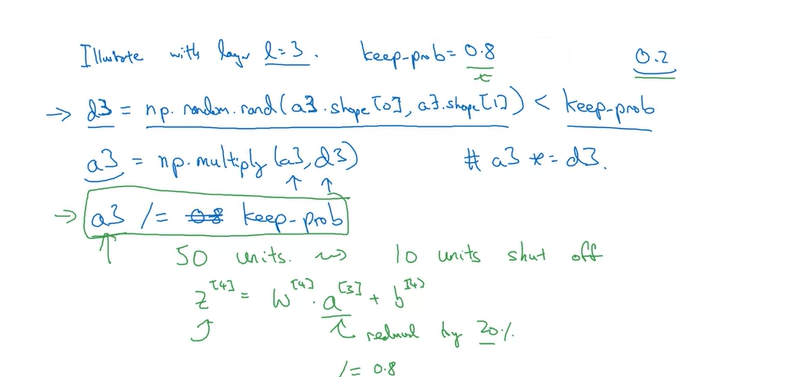

#### Understanding Dropout

$w^{[1]}=7$x$3$, $w^{[2]}=7$x$7$, $w^{[3]}=3$x$7$, 
$w^{[2]}$擁有最多的參數，對於擁有很多參數的圖層會將keep-prop設的更小(視為高正則化)

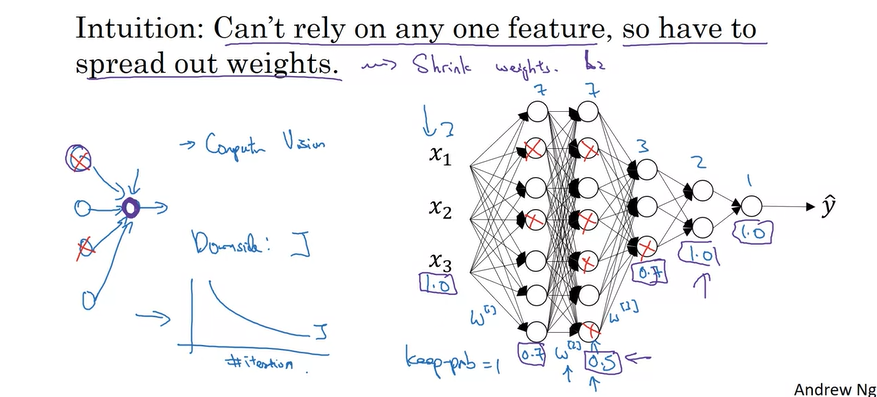

**缺點:**  
* 每次迭代都不再明確定義成本函數J，因此若要檢查成本函數是否有在持續下降，需要先將keep-prop設為1(關掉)

#### 其他正則化方法

**擴增數據集**  

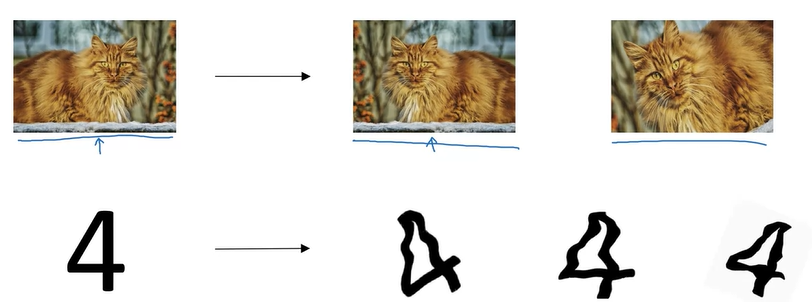

**提早結束迭代(Early stopping)**

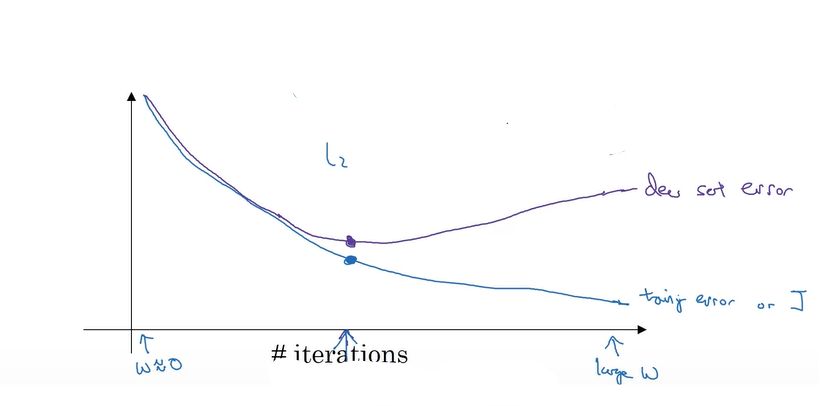

#### 為什麼正則化可以降低過擬和?
* 將$\lambda$設為很大的值，權重矩陣$w^{[l]}\approx0$，可視為將很多隱藏單元中的權重設置的過於接近0，而使的那些隱藏單元的影響被消除(簡化神經網路，變的越來越接近邏輯回歸)

### 正規化(Normalizing Inputs)

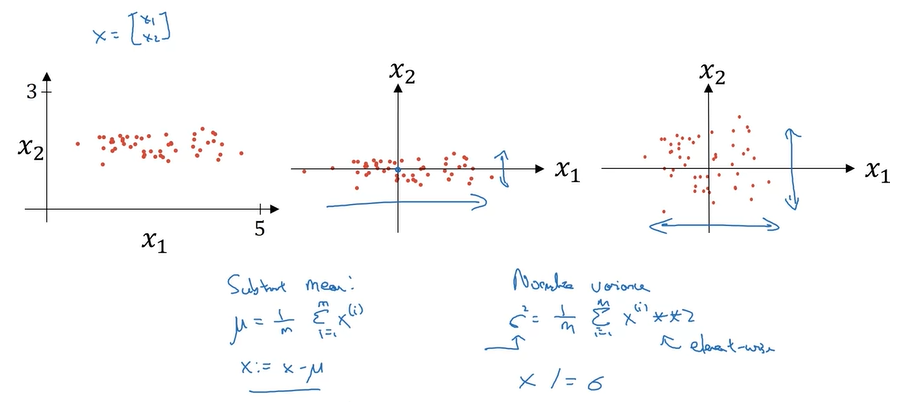



* 第一步：減去均值或歸零  
  Subtract mean:$\mu=\frac{1}{m}\sum\limits^{m}_{i=1}x^{(i)}$　　$x:=x-\mu$  
  $x_1$的方差大於$x_2$
* 第二步：  
  normalize variance:$\sigma^2=\frac{1}{m}\sum^{m}_{i=1}x^{(i)}**2$(因為$x^{(i)}$已經減去均值，因此$x^{(i)}**2$就是方差，$\sigma$是包含每個特徵方差的向量)  
  $x=x/\sigma$，使得$x_1,x_2$的方差都等於1  


#### 為什麼需要將輸入正規化?
若沒有使用正規化，且繪製的圖像下方一樣分布的不均勻，則可能需要使用非常小的學習率才可以避免震盪達到最低點。  
而正則化後繪製出的圖會非常平均。
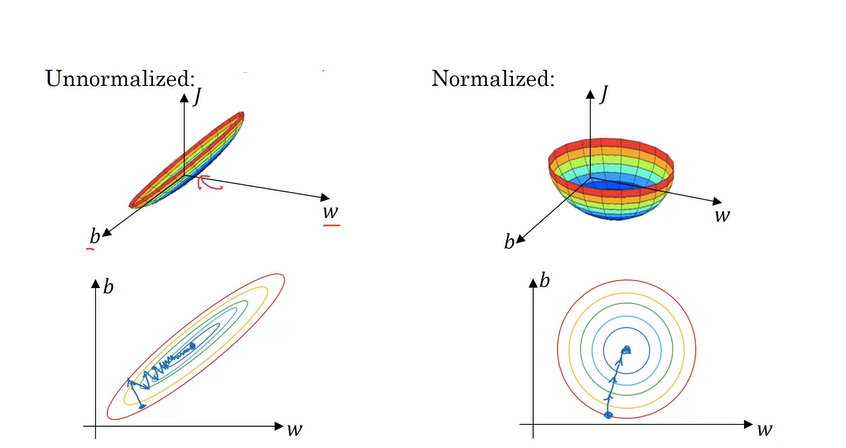

### 梯度下降

#### 梯度的消失或爆炸
* 梯度下降的過程中損失函數的導數(斜率)可能變得非常小或者非常大。

假設有一個如下方的神經網路，為了簡化，每層只有2個神經元  
激活函是$g(z)=z$，線性激活函數，$b^{[l]}=0$  
此情況下，$\hat{y}=w^{[L]}w^{[L-1]}w^{[L-2]}...w^{[2]}w^{[1]}x+b\textcolor{lightgray}{(b=0)}$  
$z^{[1]}=w^{[1]}x+\textcolor{lightgray}{0}$  
$a^{[1]}=g(z^{[1]})=z^{[1]}$  
$a^{[2]}=g(z^{[2]})=g(w^{[2]}a^{[1]})=z^{[2]}$  

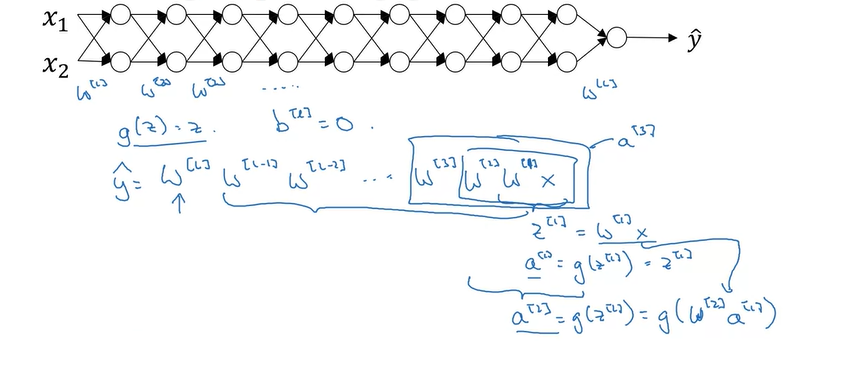

假設每個權重矩陣$w^{[l]}$比單位矩陣再稍微大一點  
$w^{[l]}=\left[ \begin{array}{ccc}
    1.5 & 0 \\
    0 & 1.5  
\end{array} \right]$  但忽略最後維度不一樣的$w^{[L]}$  
$\hat{y}=w^{[L]}\left[ \begin{array}{ccc}
    1.5 & 0 \\
    0 & 1.5  
\end{array} \right]^{L-1}x \rightarrow 1.5^{L-1}x$若這是一個很深的網路$L$很大，啟動值會爆炸(指數上增)$\rightarrow$$\hat{y}$會非常大


$w^{[l]}=\left[ \begin{array}{ccc}
    0.5 & 0 \\
    0 & 0.5  
\end{array} \right]$  但忽略最後維度不一樣的$w^{[L]}$  
$\hat{y}=w^{[L]}\left[ \begin{array}{ccc}
    0.5 & 0 \\
    0 & 0.5  
\end{array} \right]^{L-1}x \rightarrow 0.5^{L-1}x$若這是一個很深的網路，$L$很大，則啟動值會隨指數減少

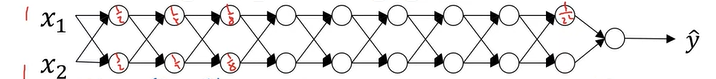  

<font color="red">**解決方法是仔細選擇初始權重**</font>

### 初始化權重
#### 單神經網路
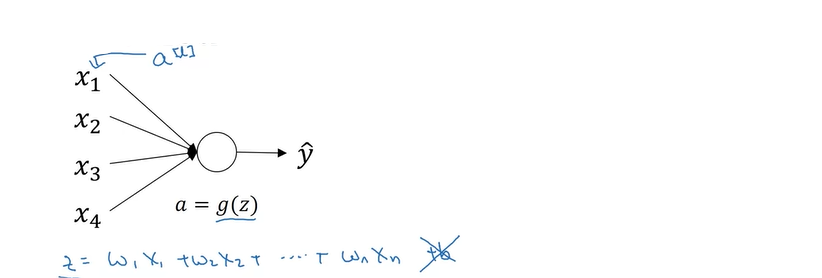
$z=w_1x_1+w_2x_2+...+w_nx_n$  
為了讓$z$不會膨脹，也不會太小。  
最大的$n$對應最小的$w_i$，因為$z$是$w_ix_i$的和，需要每個項目都小一點，可以將$w_i變異成\frac{1}{n}, n$是輸入特徵的數目  
$\rightarrow w^{[l]}=np.random.randn(shape)*np.sqrt(\frac{1}{n^{[l-1]}})$,$n^{[l-1]}$為輸入到第$l$層中的單元數(特徵)  

若使用ReLU$\rightarrow w^{[l]}=np.random.randn(shape)*np.sqrt(\frac{\textcolor{red}{2}}{n^{[l-1]}})$；$g(z)=ReLU(z)$  

若使用tanh$\rightarrow w^{[l]}=np.random.randn(shape)*\textcolor{red}{\sqrt{\frac{1}{n^{[l-1]}}}}$；$g(z)=tanh(z)$  
或者$\rightarrow w^{[l]}=np.random.randn(shape)*\textcolor{red}{\sqrt{\frac{2}{n^{[l-1]}+n^{[l]}}}}$；$g(z)=tanh(z)$  

此種設置$w$的方法會使的$w$不會比1大太多，可避免梯度消失或過快膨脹。  



### 梯度下降檢驗
$f(\theta)=\theta^3　\rightarrow　g(\theta)=3\theta^2$  
雙側$\frac{f(\theta+\varepsilon)-f(\theta-\varepsilon)}{2\varepsilon}$取值計算後的誤差是0.0001，單側(小三角形)$\frac{f(\theta+\varepsilon)-f(\theta)}{\varepsilon}$計算後的誤差是0.003  
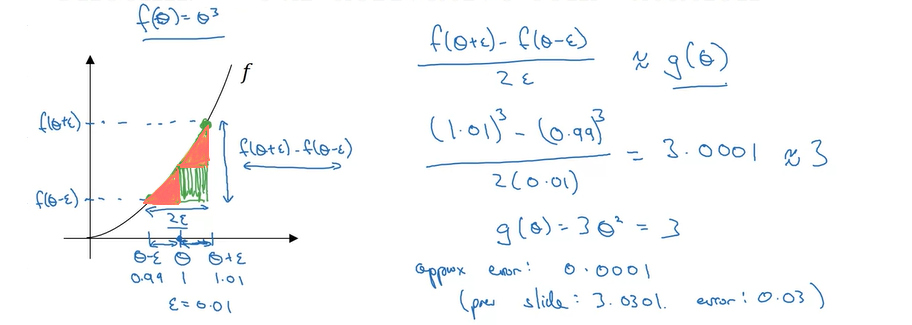


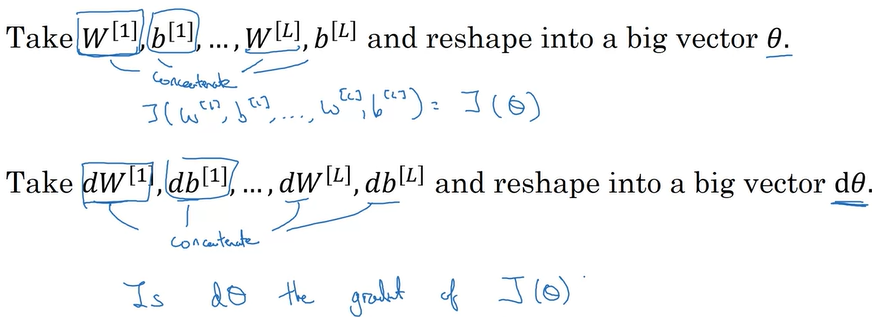  

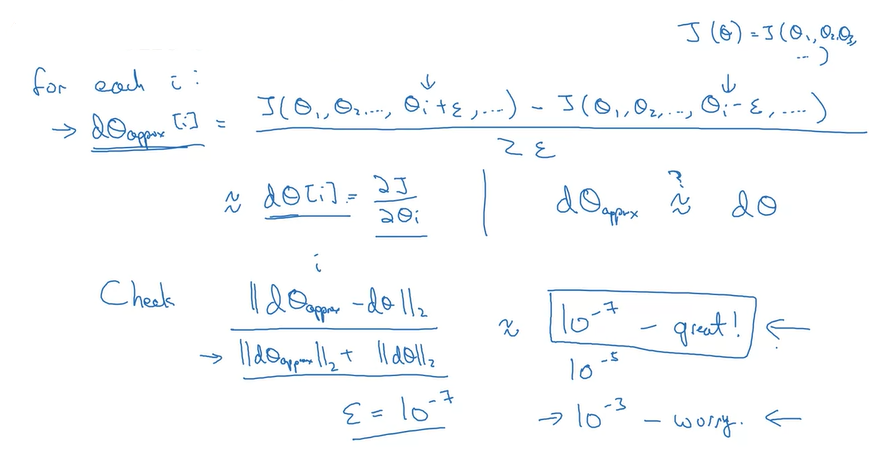


* 不要在訓練中使用梯度檢查，只在debug時使用，因為計算$d\theta_{approx}[i]$以確保接近$d\theta$的過程很慢
* 如果算法在梯度檢查時發現錯誤，需要去檢查他的組成，ex.查看$d\theta_{approx}[i]$跟$d\theta$間差距最大的$i$，以便推測出bug出現在哪層中
* 若使用了正則化，記得在梯度中加上正則項
* 梯度檢驗不能與隨機失活(dropout)一起使用，因為每次都清除隨機的神經元，因此不存在容易計算的代價函數，可先將keep-prob=1，再使用梯度檢查
* 在隨機初始化的時候運行梯度檢查

## 優化演算法

### 小批量梯度下降法(Mini-batch Gradient Descent)
使用Vectorization可以加快計算速度，但若數據有500萬甚至更多，則還是會導致運算速度下降，因此可採小批量計算。

假設有500萬個樣本，將樣本以1000為一批次分組，分開計算梯度下降。  

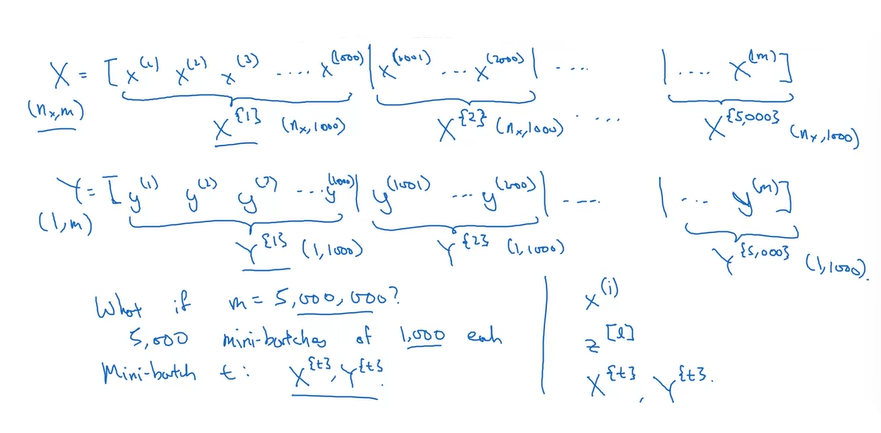


$J^{t}=\frac{1}{1000\textcolor{gray}{訓練子集規模}}\sum\limits^{l}_{i=1}L(\hat{y}^{(i)},y^{(i)}\textcolor{gray}{訓練子集(X^{t},Y^{t})中的樣例})+\textcolor{red}{\frac{\lambda}{2*1000}\sum\limits_{l}||w^{[l]}||^2}\textcolor{pink}{正則化項}$
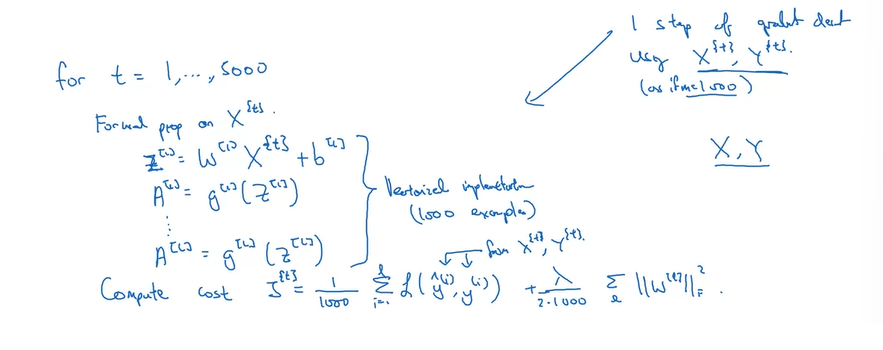

對訓練集的一次遍歷→在此例中一個epoch執行5000(Mini-batch次)次梯度下降。  
普通的梯度下降法，一個epoch執行1次梯度下降。
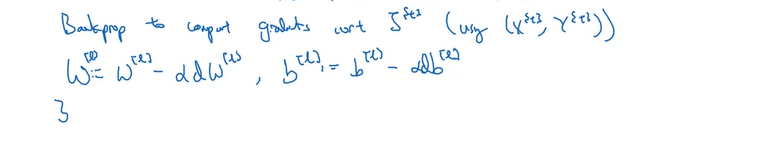

#### Understanding Mini-batch Gradient Descent
* 批次梯度下降法中，每次迭代都會經過整個訓練集，希望成本在每次的迭代中都會下降，若有任何地方上升，都代表有錯誤發生。ex.學習率太大。  
* 最小批次梯度下降法中，每次迭代不一定都會下降，因為每次只訓練一小部分的訓練集($X^{\{t\}},Y^{\{t\}}$)，因此每次迭代都訓練不同批的小量資料集，因此成本雖有往下的趨勢，但有躁動。  

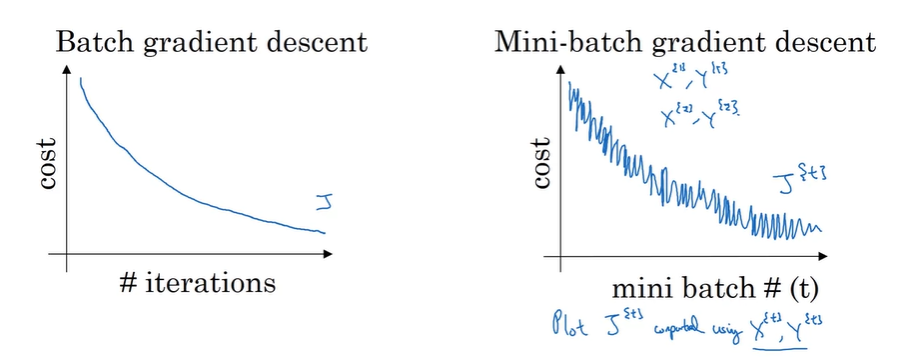


**選擇mini-batch size**  
* mini-batch size = m(總資料數) : 批量梯度下降法
  若訓練集太大(m太大)，會花費很多時間。  
  **當m<=2000時建議使用**。
* mini-batch size = 1 : 隨機梯度下降法  
  $(X^{\{t\}},Y^{\{t\}})=(x^{(t)},y^{(t)})$, ex.$(X^{\{1\}},Y^{\{1\}})=(x^{(1)},y^{(1)})$為訓練數據中的第一個樣本。  
  隨機梯度下降法每次都只使用一個樣本，運行梯度下降。


批量梯度下降(藍色)。  
隨機梯度下降(紫色)會受每次使用的數據影響，若這次的數據偏差較大則梯度可能上升，因此噪聲較大，一般而言仍會沿著正確方向下降，但仍有走向錯誤方向的風險，且最終不會收斂到一個點上，會在最低點附近擺動。  

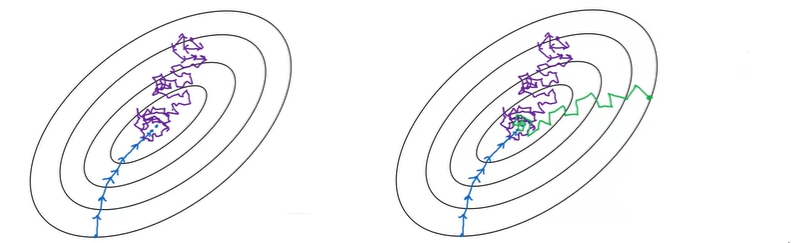

通常mini-batch size會介於1到m之間(**建議設為2的冪次方(ex.$2^9=512$)，為了確保可以一次將所有數據放入電腦GPU/CPU中**)，還可藉由使用較小的學習率減少噪聲。  
**缺點：**若mini-batch size設太小，會失去了通過向量加速運算的機會，因此最好選擇一個中間值。  

**改良後(綠色):**
1. 不用等待整個訓練集都便利完才能運行梯度下降  
2. 可以用一個向量同時處理多個樣本


### 指數加權平均(Exponentially Weighted Averages)
又名「指數移動平均」 (exponentially weighted moving averages)。  

以溫度為例，計算溫度局部平均(local average)或移動平均(moving average)。
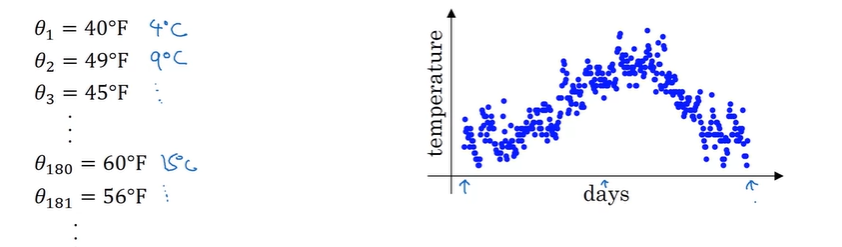  




$\textcolor{red}{v_t=\beta v_{t-1}+(1-\beta)\theta_t}$，$v_t=$平均$\frac{1}{1-\beta}天的氣溫$  

> $\beta=0.9$(紅色)，$\frac{1}{1-\beta}=\frac{1}{0.1}=10$天  
> $v_0=0$  
> $v_1=0.9v_0+0.1\theta_1$  
> $v_2=0.9v_1+0.1\theta_2$  
> $v_3=0.9v_2+0.1\theta_3$  
> ...  

> $\beta=0.98$(綠色)，$\frac{1}{1-\beta}=\frac{1}{0.02}=50$天  

> $\beta=0.5$(黃色)，$\frac{1}{1-\beta}=\frac{1}{0.5}=2$天  
> 
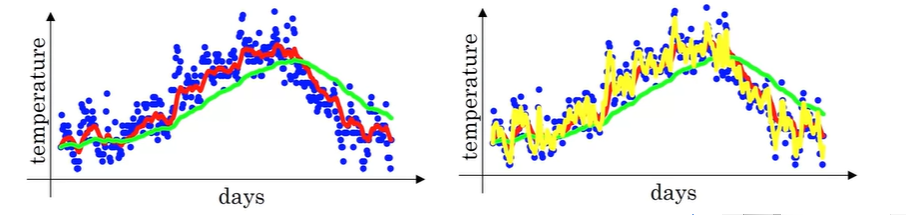

#### 分析
\--------------------------------------------  
$v_{100}=\beta v_{99}+(1-\beta)\theta_{100}$  
$v_{99}=\beta v_{98}+(1-\beta)\theta_{99}$  
$v_{98}=\beta v_{97}+(1-\beta)\theta_{98}$  
...  
\--------------------------------------------

加權總和：
$v_{100}=\textcolor{red}{\beta v_{99}}+(1-\beta)\theta_{100}$  
$\rightarrow v_{100}=(1-\beta)\theta_{100}+\textcolor{red}{\beta(v_{98}+(1-\beta)\theta_{99})}$  
$\rightarrow v_{100}=(1-\beta)\theta_{100}+(1-\beta)\beta\theta_{99}+(1-\beta)\beta^2\theta_{98}+(1-\beta)\beta^3\theta_{97}+...$  

(溫度,日期)乘以指數衰減函數，加總起來可以得到$v_{100}$。  

$v_t=$平均$\frac{1}{1-\beta}天的氣溫$，  
以$\beta=0.9$為例，$0.9^{\textcolor{red}{10}}\approx0.35\approx\frac{1}{e}$，大約$10$天後指數會衰減至約$\frac{1}{3}$  
$\rightarrow\varepsilon=1-\beta=0.1,　(1-\varepsilon)^{\frac{1}{\varepsilon}}=\frac{1}{e}$  



優點：佔非常少的記憶體，只需要一直更新$V_\theta$算出最新的值。  

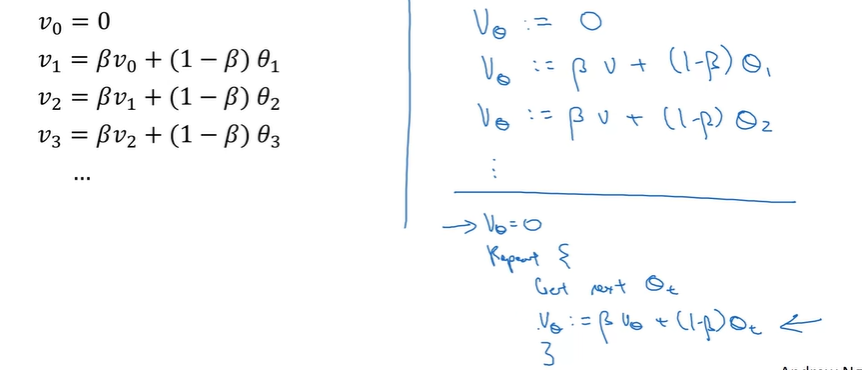


#### 偏差矯正(Bias Correction)
幫助加權平均值的計算更加準確。  
$\beta=0.98$，初始化$V_0=0$  
$\textcolor{red}{V_t=\beta V_{t-1}+(1-\beta)\theta_t}$  
$V_1=0\textcolor{lightgray}{(=0.98V_0)}+0.02\theta_1$  
$V_2=0.98(0.02\theta_1)+0.02\theta_2$  
未矯正時，最初會紫色線條的走勢過低，只為$0.02倍\theta_1$。  

矯正公式：$\textcolor{red}{\frac{V_t}{1-\beta^t}}$  
當$t=2:\frac{V_2}{1-\beta^2}=\frac{V_2}{1-0.98^2}=\frac{0.98(0.02\theta_1)+0.02\theta_2}{0.0396}$  
當$t$變大時$1-\beta^2$會接近$0$，因此減緩矯正的影響。

在學習的初始階段時，偏差矯正可以幫助從紫線變成綠線。

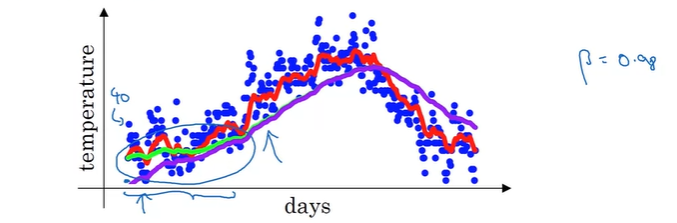

### 動量梯度下降法(Gradient Descent with Momentum)
幾乎總會比標準的梯度下降算法更快，主要方法是計算梯度的指數加權平均，並用此更新權重。  
上下震盪會減慢梯度下降的速度，且無法使用較大的學習率。  
* 縱軸希望學習慢一點，以消除震盪。
* 橫軸希望加快學習速度，以盡快由左到右到達紅點。
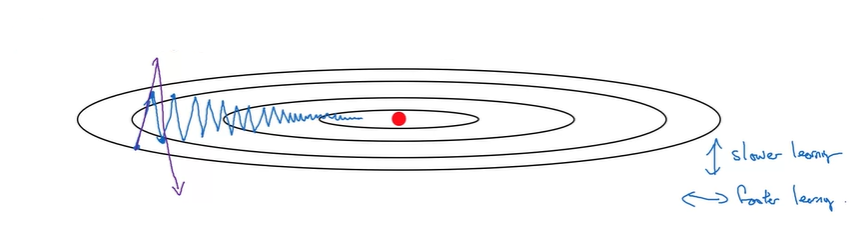


因為上下震盪的方向相反，因此加權平均後會趨於平緩，使震盪變小，而在水平方向上，所有導數都指向水平方向的右邊，因此水平方向移動會更快。  

**超參數：**  
* $\alpha:$學習率
* $\beta:$控制指數加權平均(通常會選0.9，計算前10次迭代梯度的平均值)

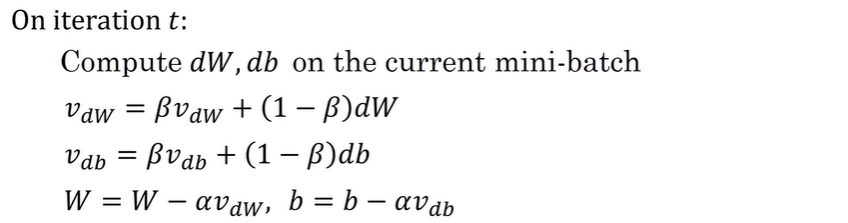
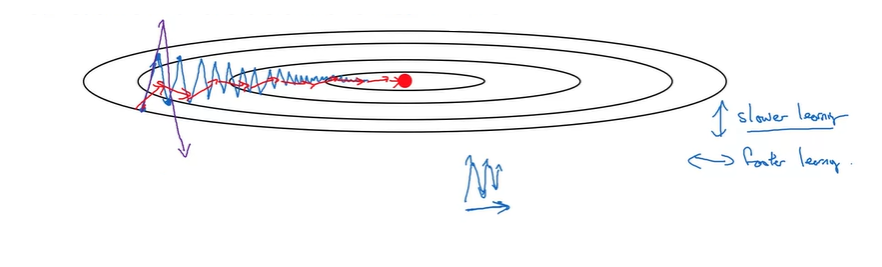

<font color="red">※通常不會用偏差校正公式，因為在10次迭代之後滑動平均值就已穩定。</font>


### 均方根傳遞(RMSprop;Root Mean Square prop)

$On　iteration　t:$  
$　　Compute　dW,db　on　the　current　mini-batch　$  
$　　S_{dW}=\beta_2 S_{dW}+(1-\beta_2)dW^2$，水平軸$dW$為較小的數，以加快學習速率。  
$　　S_{db}=\beta_2 S_{db}+(1-\beta_2)db^2$，垂直軸$db$為較大的數，以降低垂直方向的震盪。  
$　　W=W-\alpha\frac{dW}{\sqrt{S_{dW}+\textcolor{red}{\varepsilon}}},b=b-\alpha\frac{db}{\sqrt{S_{db}+\textcolor{red}{\varepsilon}}}$，
$\textcolor{red}{\varepsilon}\approx 10^{-8}$是為防止$dW$的平方根過於接近0，而發生除以過小的數。

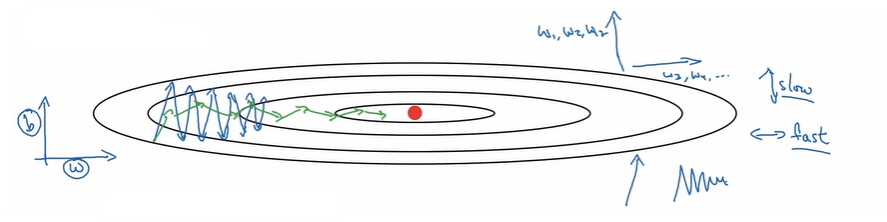

### Adam optimization algorithm
結合動量與RMSprop。  

**初始化**  
$V_{dW}=0,S_{dW}=0;V_{db}=0,S_{db}=0$  
$On　iteration　t:$  
$　　Compute　dW,db　using　current　mini-batch　$  
$　　V_{dw}=\beta_1V_{dW}+(1-\beta_1)dW, V_{db}=\beta_1V_{db}+(1-\beta_1)db \rightarrow $動量$ \beta_1$  
$　　S_{dW}=\beta_2 S_{dW}+(1-\beta_2)dW^2, S_{db}=\beta_2 S_{db}+(1-\beta_2)db^2 \rightarrow $RMSprop $\beta_2$  

**偏差矯正**  
$V^{corrected}_{dW}=\frac{V_{dW}}{(1-\beta_1^t)}, V^{corrected}_{db}=\frac{V_{db}}{(1-\beta_1^t)}$  
$S^{corrected}_{dW}=\frac{S_{dW}}{(1-\beta_2^t)}, S^{corrected}_{db}=\frac{S_{db}}{(1-\beta_2^t)}$  

$W:=W-\alpha\frac{^{corrected}_{dW}}{\sqrt{S^{corrected}_{dW}+\varepsilon}}$  
$b:=b-\alpha\frac{^{corrected}_{db}}{\sqrt{S^{corrected}_{db}+\varepsilon}}$  


**超參數：**  
* $\alpha:$學習率，自行調適
* $\beta_1:$控制$dw$加權平均，默認選擇0.9
* $\beta_2:$計算$dw$平方的移動加權平均值，推薦0.999
* $\varepsilon:$建議使用$10^{-8}$，但這個值不重要，大多數情況可以不設置

### Learning Rate Decay
隨著時間，慢慢降低學習率將有助於加快學習速度，稱為學習率衰減。  

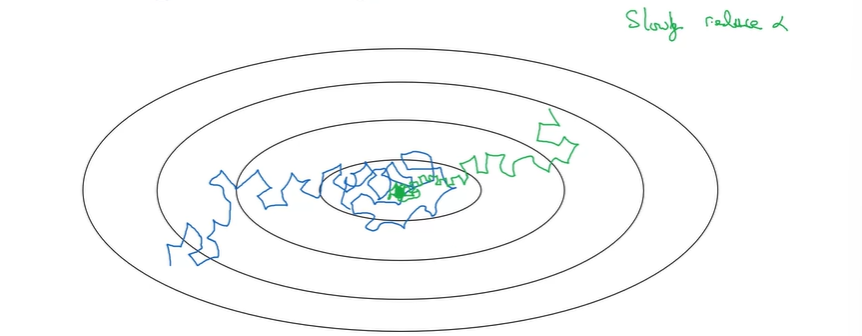

**方法:**  
* 一epoch是一次數據傳遞
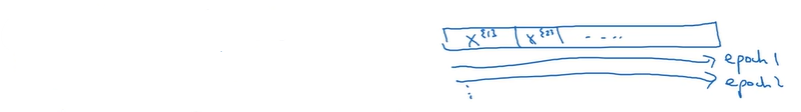

學習率衰減的公式：$\alpha=\frac{1}{1+decayRate*epochNumber}\alpha_0$  


ex. $decayRate=1, \alpha_0=0.2$  
隨epoch變化，學習率會降低。  
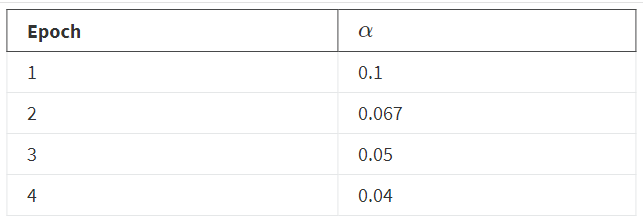



#### 其他學習率衰減方法
* $\alpha=0.95^{epochNumber}\alpha_0-以指數級的速度衰減$  
* $\alpha=\frac{k}{epochNumber}\alpha_0$  
* $\alpha=\frac{k}{\sqrt{t}}\alpha_0$
* $\alpha$採離散下降，維持某個值一段時間，下降後再維持某個值一段時間
* 手動控制$\alpha$，透過觀察變化，每小時、每天調整$\alpha$

### 降低學習速度的問題

#### 局部最優問題
下方二維圖中充滿許多局部最優，但在訓練模型上維度可能會遠高於2維，以20000維為例，若發生局部最優，則代表在所有20000個方向中都滿足凸函數，而這種情況發生的機率非常低。  
因此在高維空間中更有可能遇到如右邊圖示的鞍點，故而在實際訓練上局部最優並不是太大的問題。  

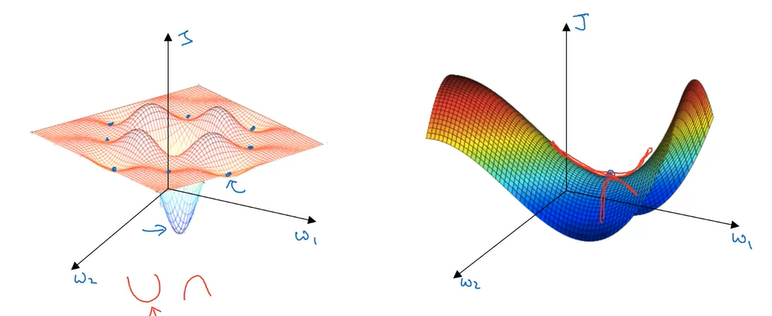


#### 停滯區(Plateaus)
停滯區為導數長時間接近零的一段區域。  
下圖中的藍色箭頭為範例，直到到達藍色箭頭的最低點，才會開始快速離開。
停滯區會讓學習變慢，這也是一些優化的梯度下降演算法能改善學習的原因。

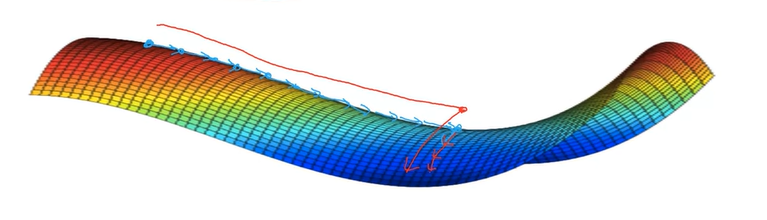

## 調節超參數

調節的重要程度排序超參數。
* $\alpha$
* $\beta$，$\approx 0.9$
* mini-batch size
* #hidden units
* #layers
* learning rate decay
* $\beta_1,\beta_2,\varepsilon$，建議使用$(0.9,0.999,10^{-8})$

### 網格

早期在調節超參數時會將超參數繪製成網格，並逐一嘗試去尋找出最優的超參數，在超參數不多時可以這樣，但當超參數變多後不建議。


可以在網格中隨機取樣，並嘗試訓練隨機取樣的超參數，觀察個別的差異，隨機的原因是因為在訓練最初，並不了解哪個超參數對於模型的影響較大。  

假設，以下圖為例，參數1是$\alpha$，參數2是$\varepsilon$，若採逐一嘗試的方式最後會發現，無論$\varepsilon$如何更動對於模型的改變都沒有太大的影響，因此儘管模擬了25次，但實際上獲得較大資訊量只有變更$\alpha$的5次。  
隨機取樣的話，會有更大的可能性獲得更有更有幫助的參數組合。

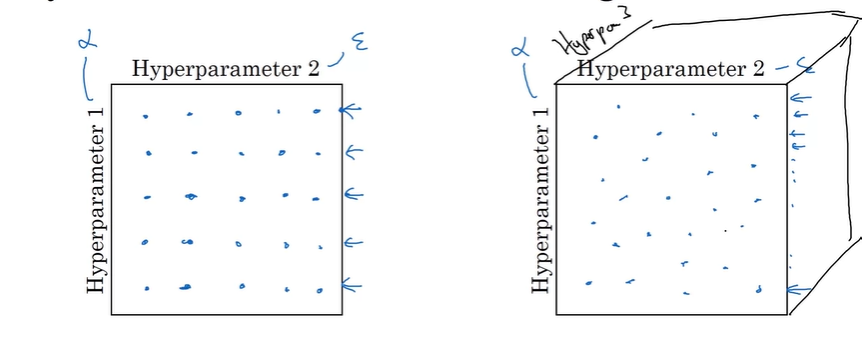



**使用區域定位的抽樣方案**  

在初始隨機抽樣後發現圈起來的參數組合會有更好的表現，接下來要將隨機抽取參數的範圍限定在這幾個組合中，以進行更為密集的抽樣。  

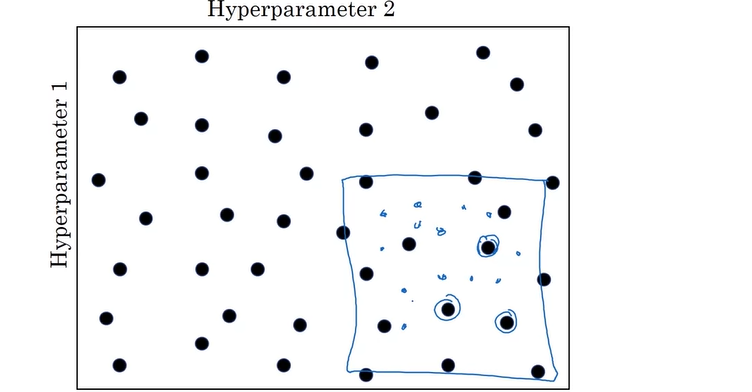


### 使用適當尺度以挑選超參數
假設現在要選擇第$l$層隱藏單元的數量$n^{[l]}$:  
希望嘗試$n^{[l]}=50$\~$100$，建立一個參考軸，$50$\~$100$，並在這個區段中隨機取值。
假設現在要選擇#layers的數量:  
希望嘗試$2$\~$4$，建立一個參考軸，$2$\~$4$，並在這個區段中隨機取值。

但隨機抽樣並不適合所有超參數，以$\alpha$為例，希望在$0.0001$\~$1$之間隨機抽樣，但通常有效的學習率不會太大，但此例中選取$0.0001$\~$0.1$的可能性$(10\%)$會遠低於選取$0.1$\~$1$，這會導致花費過多時間在沒有意義的嘗試上。  
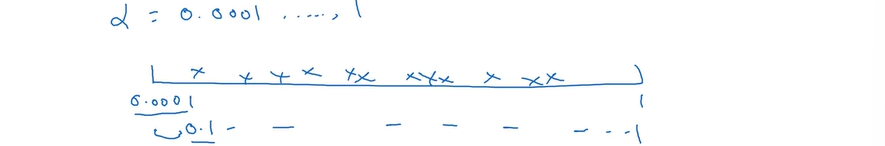  
將線性尺度更改成對數尺度，這樣可以有更多機會隨機取樣到$0.0001$\~$0.1$間。
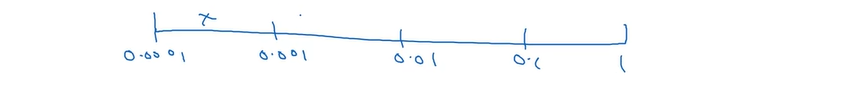
$log_{10}0.0001=-4$, $log_{10}1=0$  
以python實作:  
```python
r=-4*np.random.rand() # [-4,0]
a=10**r # [10^{-4},10^0]
```


以$\beta$為例:  
$\beta=0.9$\~$0.999$  
$1-\beta=0.1$\~$0.001$  
$r\in[-3, -1]$[](attachment:2861bef9-78ef-479a-b61c-1a508843c325.png)
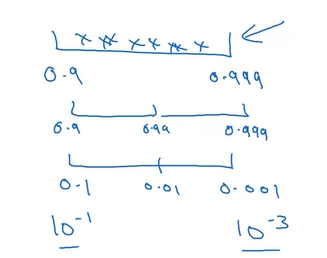  
$1-\beta=10^r$  
$\beta=1-10^r$  

要改成對數尺度的原因是因為當$\beta從0.9→0.9005$時不會對結果有太大的影響。但$\beta從0.999→0.9995$時會對運行的算法產生巨大影響。  
因為公式是$\frac{1}{1-\beta}$，因此$1-\beta$越接近$0$造成的改變越大，因此更改後會得到更高效的樣本分布，在隨機取樣時更有效率。

### Practice: Pandas vs. Caviar
隨著數據的逐漸更新，以及使用服務器的版本更新，最優超參數的值都可能會逐漸改變，因此每隔幾隔月至少需要重新檢測、評估一次原先的超參數是否仍是最優解。


* 只有單一模型，因為具備龐大數據集，但沒有充足計算資源(ex.CPU、GPU不夠)  
  需要密切關注訓練情況(幾周)，且每天都在微調參數。
* 並行訓練多個模型  
  同時間運行多種超參數組合的模型，從中選擇最優的結果。

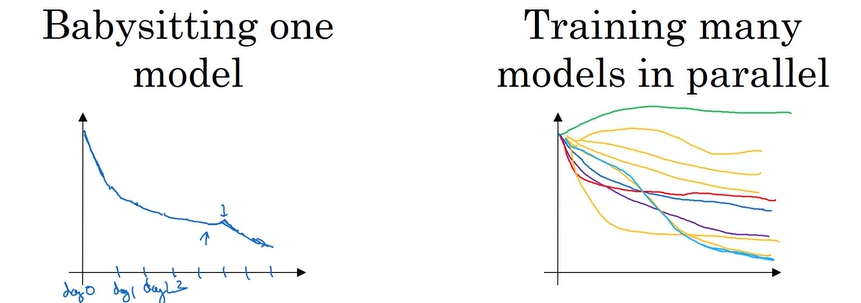
  

## 批量歸一化(Batch Normalization)
讓超參數搜索變得更簡單。  


在訓練模型時可以透過歸一化輸入層，幫助模型加速學習過程。  
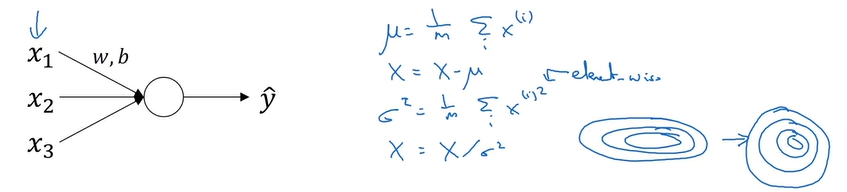

當使用具有更多層的模型時，不僅有輸入特徵$x$，還有激活函數的輸出結果$a^{[i]}$。  
假如要訓練參數$w^{[3]}、b^{[3]}$，如果不對$a^{[2]}$進行歸一化，那麼訓練$w^{[3]}、b^{[3]}$都不會太有效率。  
此外，在學術上要針對在激活函數前進行歸一化$z^{[2]}$，或者激活函數後進行歸一化$a^{[2]}$各執一詞，但普遍上對$z^{[2]}$進行歸一化的仍佔多數。  
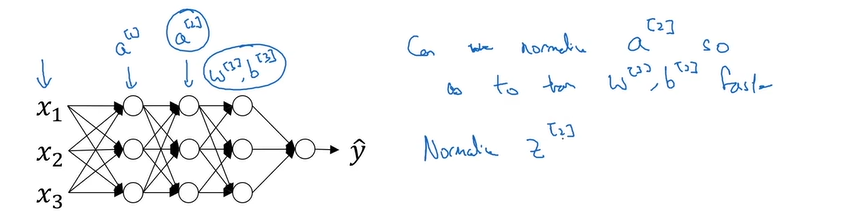


### Batch Norm-單隱藏層

假如有一些神經網路的中間值，$z^{[l](1)}...z^{[l](m)}，來自l層$。  
$\mu=\frac{1}{m}\sum\limits_{i}z^{[l](i)}$  
$\sigma^2=\frac{1}{m}\sum_{i}(z^{[l](i)}-\mu)^2$  
$z^{[l](i)}_{norm}=\frac{z^{[l](i)}-\mu}{\sqrt{\sigma^2+\varepsilon}}$($+\varepsilon$以避免變為0) → 成功將$z$變成均值0，方差1的值    
$\tilde{z}^{[l](i)}=\gamma z^{[l](i)}_{norm}+\beta$，$\gamma、\beta$可以從模型中學習(梯度下降法或者類似的算法，就像更新神經網路的權重一樣)，不同的$\gamma、\beta$使的隱藏層可以有任何均值或方差。  
若$\gamma = \sqrt{\sigma^2+\varepsilon}、\beta = \mu$，則$\tilde{z}^{[l](i)}=z^{[l](i)}_{norm}$


對輸入特徵$x$歸一化可以幫助神經網路訓練，而Batch norm不僅在輸入層，在一些隱藏層中也對$z$做了歸一化，此外隱藏層歸一化後不一定是均值0、方差1。  
例如，有激活函數sigmoid，歸一化後不希望數據都集中在紅線上(在sigmoid中都集中在近似直線的區域)，希望他們能有更大的方差，以便於更好的利用非線性的特性，因此可透過調整$\gamma、\beta$去控制$z^{(i)}$(的方差、均值)在希望的範圍中。  
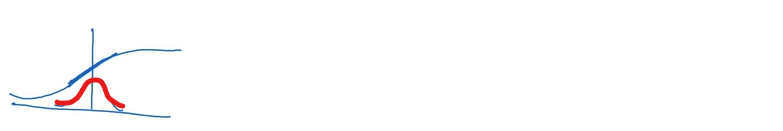

### Batch Norm-深度網路
每個神經元都可視為兩步計算:
* 計算$z^{[i]}$
* 將$z^{[i]}$傳遞給激活函數去計算$a^{[i]}$
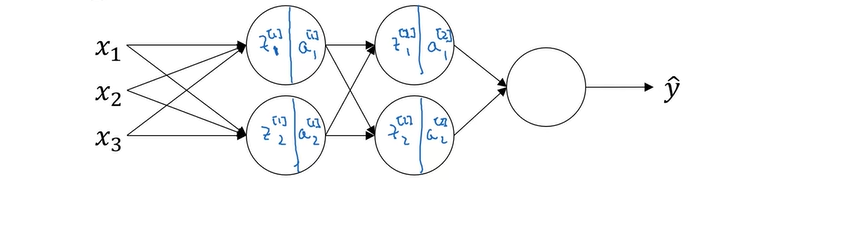

若不採用Batch Norm，讓$x$進入第一層隱藏層中，由$w^{[1]},b^{[1]}$計算出$z^{[1]}$，接著將$z^{[1]}$輸入進激活函數，計算$a^{[1]}$。

若採用Batch Norm(BN)，讓$x$進入第一層隱藏層中，由$w^{[1]},b^{[1]}$計算出$z^{[1]}_1$，接著由$\gamma^{[1]}、\beta^{[1]}$決定$\tilde{z}^{[1]}_1$，將$\tilde{z}^{[1]}_1$輸入進激活函數，計算$a^{[1]}=g^{[1]}(\tilde{z}^{[1]}_1)$。  
接著與第一層類似，$a^{[1]}$作為第二層的輸入，由$w^{[2]},b^{[2]}$計算出$z^{[2]}_1$，接著由$\gamma^{[2]}、\beta^{[2]}$決定$\tilde{z}^{[2]}_1$，輸入進激活函數，計算$a^{[2]}$。  

程式中實現BN:
```python
tf.nn.batch_normalization
```

<font color="red">**※此處的$\beta$與Adam...等算法中的$\beta$不同。**</font>


使用Batch Norm的深度網路會有以下超參數。  
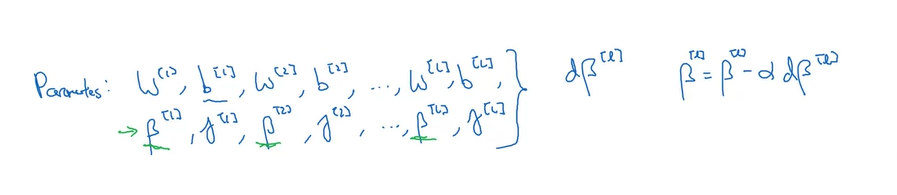
此處的$\gamma、\beta$都可以用Adam、RMSprop、Momentum算法去更新。  

### 少批量BN算法(mini-batches)
實務上，應用到訓練集上的是少批量BN算法。  

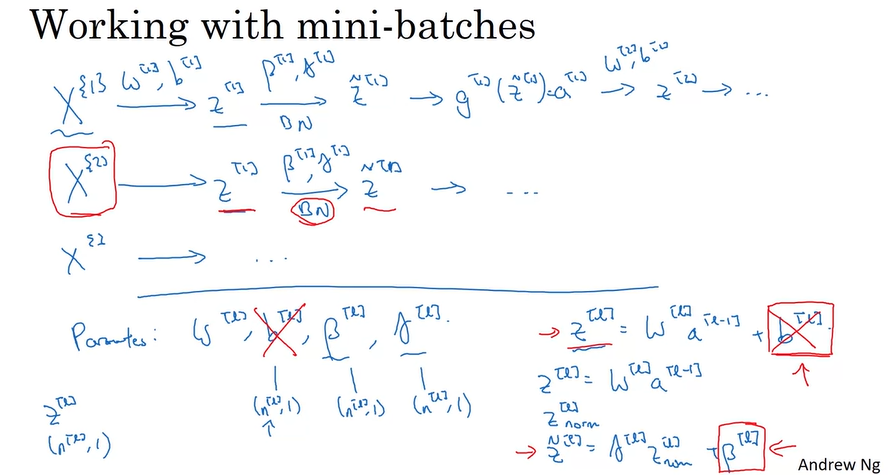

參數中的$b^{[l]}$可以忽略，因為在歸一化時會減去均值，因此可將$b^{[l]}$視為0，因為加上任何常量都不會有任何影響。  
反之，$b^{[l]}$被$\beta^{[l]}$代替，以控制最終偏移量影響。  

$z^{[l]}$的維度是$(n^{[l]},1)$，$b^{[l]}$、$\beta^{[l]}$、$\gamma^{[l]}$的維度都相同，$n^{[l]}=$隱藏單元數。


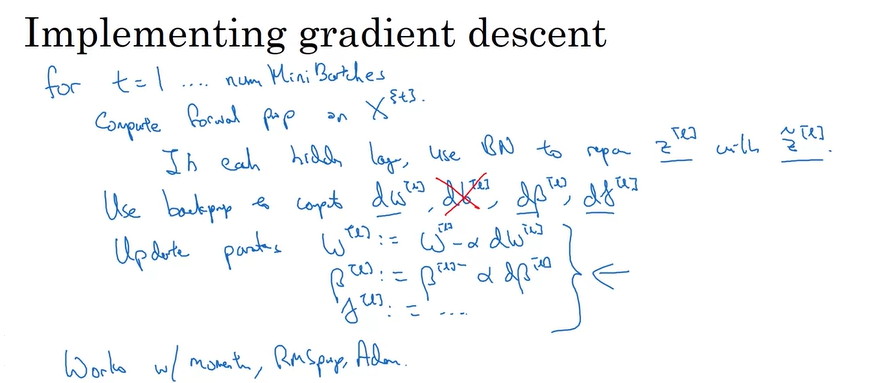

### Why does Batch Norm work?
* 歸一化後的值會具有相同或相似的變化範圍，可以加速學習
* 使在深層(ex.10層)的權重相較淺層(ex.0層)更具魯棒性(robust)  
  魯棒性的3個要求：  
  * 模型具有較高的精度或有效性。  
  * 對於模型假設出現的較小偏差（noise），只能對演算法表現產生較小的影響。  
  * 對於模型假設出現的較大偏差（outlier），不能對演算法效能產生「災難性」的影響。  


不能指望左側訓練出的模型同樣適用於右側，雖然可能存在相同的有效函數，但無法確保僅藉由左方的數據與學習算法可以完美找出右方的綠色決策邊界。
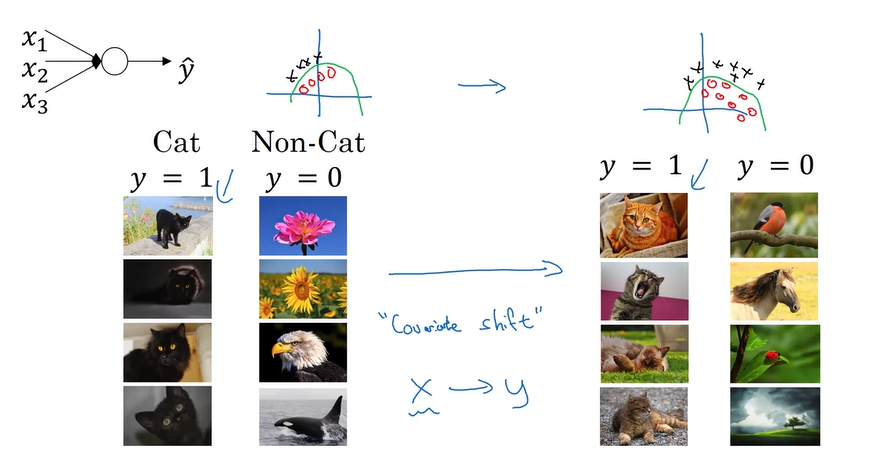
※如果$x$的分布變化了，儘管$x-y$映射的真函數沒變(依舊是判斷是否是貓)，仍必須重新訓練學習算法。  
若真函數變了，這甚至可能變得更糟。


**協變量問題**  
以箭頭所指的第三層為例，這層的值為$a^{[2]}$與$w^{[3]},b^{[3]}$運算後傳入的值，相應的第二層的值由$a^{[1]}$傳入，因此後面層會受前面層更新的變數影響。  
經過批次標準化之後，不論前面幾層的變數如何改變，自己本身這層的平均值與變異數都會保持不變，以$z^{[2]}_2,z^{[2]}_1$為例，儘管因為前面層的變數改變了，但$z^{[2]}_2,z^{[2]}_1$的平均數與變異數仍然是$(0,1)$，或由$\beta^{[2]},\gamma^{[2]}$控制的值。  

<font color="red">**※限制了前面幾層更新參數後對後面值分佈的影響幅度，標準化減輕了輸入變化帶來的問題，讓後面的值更加穩定，可以較不依靠前面的值而進行自我學習，如此可以加快網路的訓練。**</font>

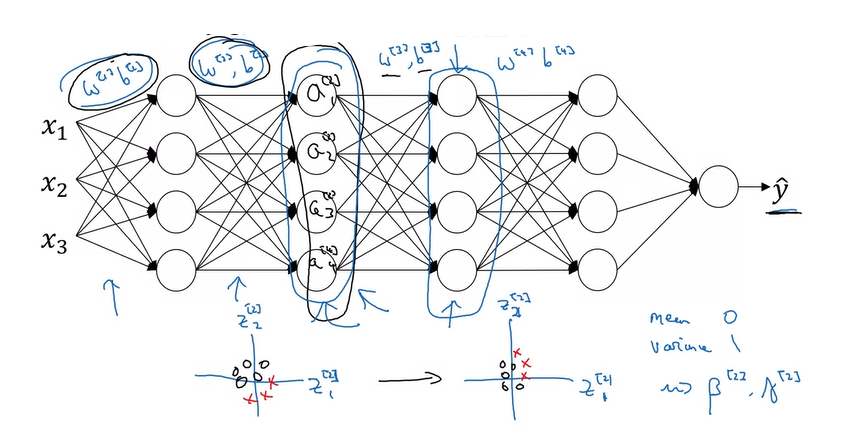



* 可以達到稍微的正規化  
  但因為加入的noise很小，正規化的效果很小，所以仍舊可以同時搭配dropout等正規化算法使用。
  此外當mini-batch的資料較多時(ex.512對比64)，噪音會減少，因此會減少正規化的效果。


※批次標準化一次處理一小批的資料，計算一批資料的平均和變異數，但在測試時，可能一次只處理一筆資料就希望評估這個神經網路，此時需要額外做一些事以確保預測有根據。  



### Batch Norm at Test Time
左方公式中的$\mu、\sigma$是透過一整批資料計算得到的，而只有一筆資料時需要透過其他方式估計出$\mu、\sigma$。  
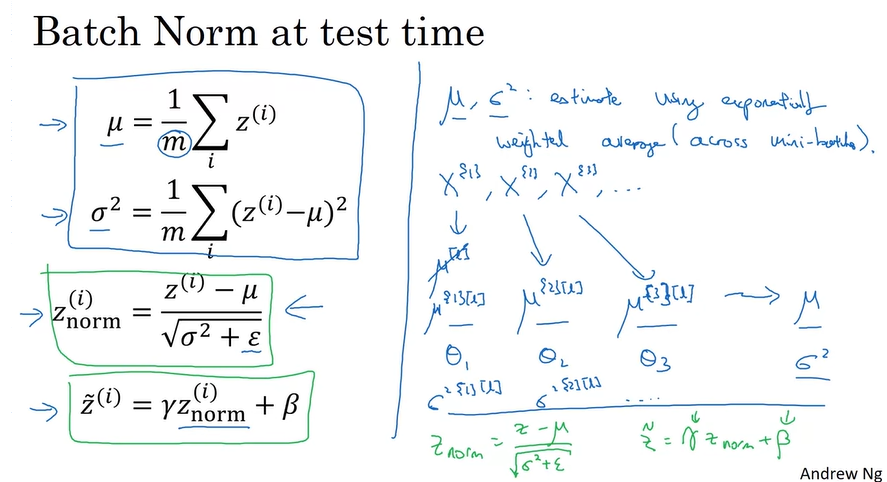
**指數加權平均(exponentially weighted average)**  
例如，假設現在在$l$層中，並使用$x^{\{1\}},x^{\{2\}},x^{\{3\}}...$等對應的小批資料  
在訓練第$l$層的$x^{\{1\}}$時會獲得$\mu^{[l]}$，視為這層的第一批$\mu=\mu^{\{1\}[l]}$，訓練第二批小量資料時，$x^{\{2\}}$時會獲得第二個$\mu$，視為這層的第二批$\mu=\mu^{\{1\}[2]}$。  

採用**之前所提到的指數加權平均(以估計溫度為例)** ，追蹤最新的$\mu、\sigma^2$的移動平均，以估計每層中$\mu、\sigma^2$的值，接著使用估計值去計算神經元的$z$。


## Softmax Regression(一種邏輯回歸)
應對多種可能的分類目標。  
* 1:貓
* 2:狗
* 3:雞
* 0:其他  
C=#要預測的總類數=4 (0,1,2,3)

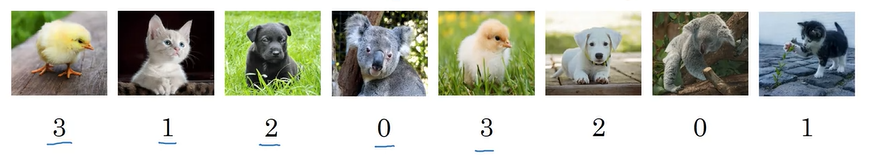

輸出層的單元數$n^{[L]}=4=C$，輸出四種類別的概率。  
$\hat{y}$為維度=(4,1)的向量。
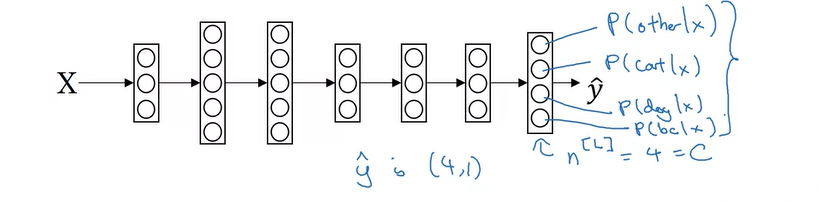

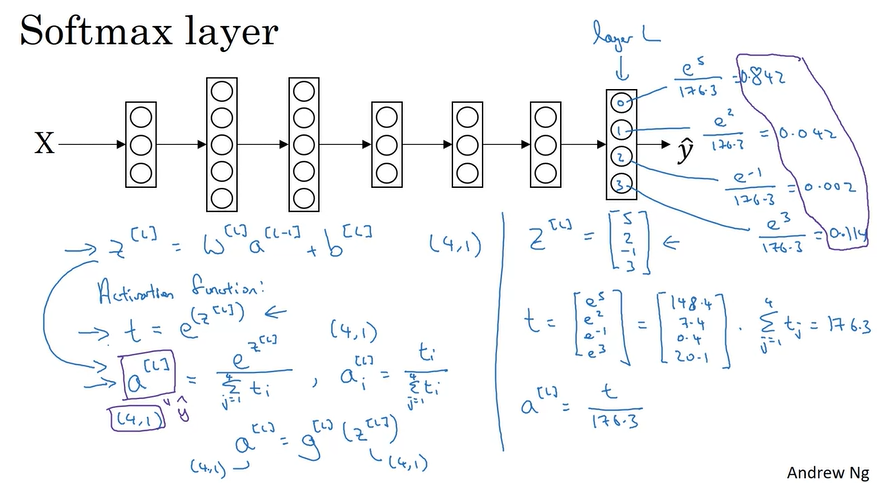

決策邊界視線性的。
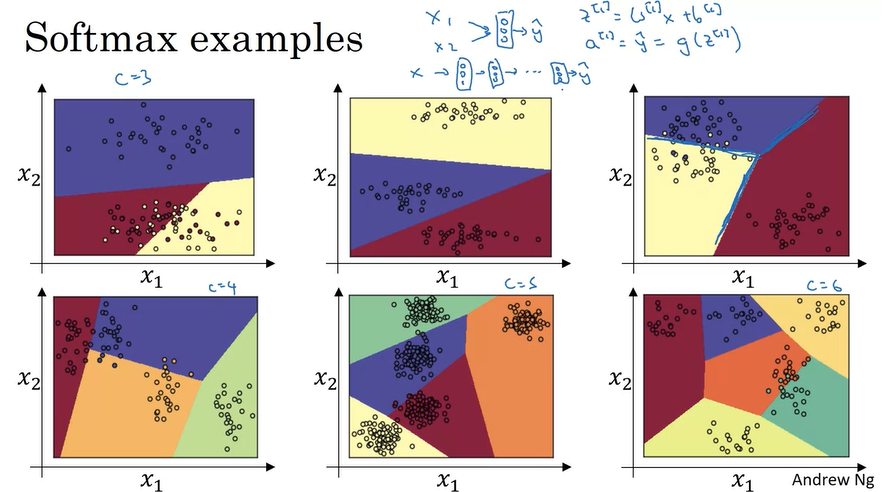



$a^{[L]}=\frac{e^{Z^{[L]}}}{\sum\limits^{4}_{i=1}t_i}$  



#### 如何訓練採用了softmax層的模型

$t$是臨時變量，表示元素$y$的冪。  
$g^{[L]}$將元素變量$t$規範化後使和成為1，得到$a^{[L]}$，$z^{[L]}$中值的大小可以對應到$a^{[L]}$中值的大小。  

softmax激活函數將logistic激活函數從2分類推廣到C分類，因此若C=2，則成為邏輯回歸。


包含softmax輸出層的神經網路:  

1. 定義損失函數:  
   $L(\hat{y},y)=-\sum\limits^{4}_{j=1}j_jlog\hat{y}_j$  
   $J(w^{[1]},b^{[1]},...)=\frac{1}{m}\sum\limits^{m}_{i=1}L(\hat{y},y)$
2. 梯度下降法的實現:  
   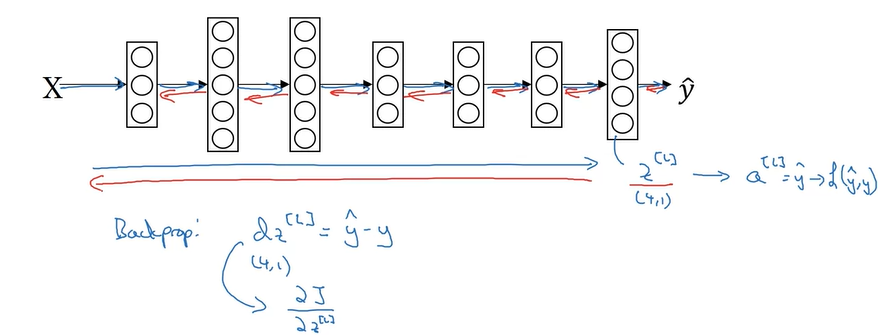

## 深度學習框架

### framework
* Caffe/Caffe2
* CNTK
* DL4J
* Keras
* Lasagne
* mxnet
* PaddlePaddle
* TensorFlow
* Theano
* Torch

### 選擇標準
* 編程的簡便性
* 運行速度
* 開源性

### TensorFlow example

假設損失函數:$J(w)=w^2-10w+25$

In [3]:
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf

2024-08-08 03:17:31.910929: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-08 03:17:31.933395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-08 03:17:32.103888: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-08 03:17:32.232204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 03:17:32.331071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [15]:
# 第一步:設定w(想要優化的參數)、優化算法
w = tf.Variable(0, dtype=tf.float32)
# 優化算法，學習率=0.1
optimizer = tf.keras.optimizers.Adam(0.1)

# 第三步:定義要循環的訓練步進函數
def train_step():
    # 第二步:設定成本函數
    # 只要實現前向傳播，後設置成本函數跟編寫程式tensorflow就會自行反向傳播或進行梯度計算
    # 其中一種方法是使用GradientTape( )，在向前計算時依序紀錄成本函數所的運算順序，接著
    # 在反向傳播時會以相反的順序重新訪問操作順序，並在此過程中計算反向傳播和梯度
    with tf.GradientTape( ) as tape:
        cost = w ** 2 -10 * w + 25 # 成本函數
    # 第二步-----------------------------------------
    # 第三步-1:定義可訓練的變量
    trainable_variables=[w] # 只有w的列表
    # 第三步-2:使用cost, trainable_variables去計算梯度
    grads = tape.gradient(cost, trainable_variables)
    # 第三步-3:使用優化器來應用梯度，梯度是grads和trainable_variables。
    # apply_gradients 方法用來應用計算出的梯度來更新變量。
    # 用zip()將grads,trainable_variables配對
    optimizer.apply_gradients(zip(grads,trainable_variables))
    print("zip(grads,trainable_variables):",tuple(zip(grads,trainable_variables)))

# numpy=0.0，表示w初值為0
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


In [16]:
train_step()
print(w)

zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=-10.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999931>),)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999931>


In [18]:
# 迭代1000次
for i in range(1000):
    train_step()
print(w)

# numpy=5.000001，是目前這個成本函數的最小值

zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=1.9073486e-06>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>),)
zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=1.9073486e-06>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>),)
zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=1.9073486e-06>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>),)
zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=1.9073486e-06>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>),)
zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=1.9073486e-06>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>),)
zip(grads,trainable_variables): ((<tf.Tensor: shape=(), dtype=float32, numpy=1.9073486e-06>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>),)
zip(grads,trainable_variable

希望最小化的不只是w，還有訓練步驟的函數
如何將訓練數據導入Tensorflow程序?


In [24]:
w = tf.Variable(0, dtype=tf.float32)
x = np.array([1.0,-10.0,25.0], dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def cost_fn():
    # 與剛剛的成本函數係數相同，但由x內的參數控制
    return x[0] * w ** 2 + x[1] * w + x[2]

print(w)
# 使用GradientTape來計算梯度並應用梯度
with tf.GradientTape() as tape:
    loss = cost_fn()
grads = tape.gradient(loss, [w])
optimizer.apply_gradients(zip(grads, [w]))
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999931>


In [26]:
# 第一步:
w = tf.Variable(0, dtype=tf.float32)
# 將x定義為數組的數字列表，型態為浮點數
x = np.array([1.0,-10.0,25.0], dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def training(x,w,optimizer):
    # 第二步:定義成本函數
    def cost_fn():
        # 與剛剛的成本函數係數相同，但由x內的參數控制
        return x[0] * w ** 2 + x[1] * w + x[2]
    for i in range(1000):
        # 使用優化器執行優化算法的最後一步
        optimizer.minimize(cost_fn, [w])
    return w
    
print(w)
w = training(x,w,optimizer)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


AttributeError: 'Adam' object has no attribute 'minimize'

In [25]:
# 第一步:
w = tf.Variable(0, dtype=tf.float32)
# 將x定義為數組的數字列表，型態為浮點數
x = np.array([1.0,-10.0,25.0], dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1)


def training(x,w,optimizer):
    # 第二步:定義成本函數
    def cost_fn():
        # 與剛剛的成本函數係數相同，但由x內的參數控制
        return x[0] * w ** 2 + x[1] * w + x[2]
    # 第三步:梯度下降
    for i in range(1000):
        # 使用優化器執行優化算法的最後一步
        # optimizer.minimize(cost_fn, [w]) # 不支援
        # ---------------更改-----------------
        with tf.GradientTape() as tape:
            loss = cost_fn()
        grads = tape.gradient(loss, [w])
        optimizer.apply_gradients(zip(grads, [w]))
        # ------------------------------------
    return w
    
print(w)
w = training(x,w,optimizer)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>
